# Purpose of Dataset Selected

The purpose of our project is to determine the reliability of an airline based on their prior on-time statistics spanning data for one year.

The following dataset is downloaded from the bureau of transportation website and contains metrics for domestic flights by major carriers.  It contains on-time arrival data such as departure and arrival delays, origin and destination airports, flight numbers, scheduled and actual departure and arrival times, cancelled or diverted flights, taxi-out and taxi-in times, air time, and non-stop distance.

For the purpose of this study, we downloaded data spanning March 2016 to February 2017.  There are 6,032,365 total records and 98 attributes in total.

# Business Understanding

In order to gauge whether the flight is reliable, we will use the following dataset features:  Departure delay, Arrival Delay, 
Cancelled, and Diverted.  

A reliable airline is defined as one where, if the flight is delayed/diverted then, departure delay is 
less than or equal to 60 minutes and arrival delay is less than or equal to 30 minutes.  In addition, the flight cancellation
rate should be <=30% for a given month.  

The data in the present dataset includes features such as weather delay, CarrierDelay,NASDelay, SecurityDelay and 
LateAircraftDelay timings in minutes.  One potential approach to predict the future reliability of the
flight could be to do cluster analysis for each airline by month based on the above delay conditions and predict future delays.
We can do stratified cross validation there forth and do Precision-Recall curve analysis to classify "positive" class outcomes.

# Data Meaning Type

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

In [2]:
pd.read_clipboard(sep='\t')

Empty DataFrame
Columns: [, diagonal='kde']
Index: []

In addition, please note the above definitions refer to CRS, which is referring to the Computer Reservation System that provides
information on airline schedules, fares and seat availability to travel agencies and allow agents to book seats and issue tickets.

Late Flight is defined as a flight arriving or departing 15 minutes or more after the scheduled time.

Arrival delay equals the difference of the actual arrival time minus the scheduled arrival time. A flight is considered on-time when it arrives less than 15 minutes after its published arrival time.

A Diverted flight is a flight that is required to land at a destination other than the original scheduled destination for reasons beyond the control of the pilot/company.

Elapsed time is the time computed from gate departure time to gate arrival time.

FIPS is a unique identifier assigned by Federal Information Processing Standards to any of a variety of geographic entities (e.g. counties, states, metropolitan areas, etc).  WAC are similar to FIPS but assigned codes are by Office of Airline Information (OAI) and are created by OAI.

In [3]:
# Read the sampled csv file
df_sampled = pd.read_csv('C:/Users/rgoyal/Desktop/MS-Data Science/Data Mining/sampled/sampled.csv', index_col=0, low_memory=False)
df_sampled.head()

ACTUAL_ELAPSED_TIME  AIRLINE_ID  AIR_TIME  ARR_DEL15  ARR_DELAY  \
2016  47.0                 20304.0     19.0      0.0       -17.0        
2016  66.0                 19790.0     50.0      1.0        27.0        
2016  153.0                19930.0     136.0     0.0       -16.0        
2016  369.0                19790.0     352.0     0.0       -14.0        
2016  68.0                 20366.0     45.0      0.0       -18.0        

      ARR_DELAY_GROUP  ARR_DELAY_NEW  ARR_TIME ARR_TIME_BLK CANCELLATION_CODE  \
2016 -2.0              0.0            2335.0    2300-2359    NaN                
2016  1.0              27.0           1530.0    1500-1559    NaN                
2016 -2.0              0.0            1244.0    1300-1359    NaN                
2016 -1.0              0.0            2049.0    2100-2159    NaN                
2016 -2.0              0.0            1824.0    1800-1859    NaN                

      ...   TAIL_NUM TAXI_IN  TAXI_OUT  TOTAL_ADD_GTIME  UNIQUE_CARRIER  \
2016  ...   N934SW    8.0     20.0     NaN               OO               
2016  ...   N906AT    6.0     10.0     NaN               DL               
2016  ...   N619AS    7.0     10.0     NaN               AS               
2016  ...   N594NW    5.0     12.0     NaN               DL               
2016  ...   N14158    4.0     19.0     NaN               EV               

      Unnamed: 109  WEATHER_DELAY  WHEELS_OFF  WHEELS_ON  YEAR  
2016 NaN           NaN             2308.0      2327.0    NaN    
2016 NaN            0.0            1434.0      1524.0    NaN    
2016 NaN           NaN             1021.0      1237.0    NaN    
2016 NaN           NaN             1752.0      2044.0    NaN    
2016 NaN           NaN             1735.0      1820.0    NaN    

[5 rows x 110 columns]

In [4]:
# Remove all the ID fields
df_sampled1 = df_sampled.drop('Unnamed: 109', axis=1)
if 'AIRLINE_ID' in df_sampled1:
    del df_sampled1['AIRLINE_ID']
if 'DEST_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DEST_AIRPORT_ID']
if 'DEST_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DEST_AIRPORT_SEQ_ID']
if 'DEST_CITY_MARKET_ID' in df_sampled1:
    del df_sampled1['DEST_CITY_MARKET_ID']
if 'DIV1_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV1_AIRPORT_ID']
if 'DIV1_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV1_AIRPORT_SEQ_ID']
if 'DIV2_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV2_AIRPORT_ID']
if 'DIV2_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV2_AIRPORT_SEQ_ID']
if 'DIV3_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV3_AIRPORT_ID']
if 'DIV3_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV3_AIRPORT_SEQ_ID']
if 'DIV4_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV4_AIRPORT_ID']
if 'DIV4_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV4_AIRPORT_SEQ_ID']
if 'DIV5_AIRPORT_ID' in df_sampled1:
    del df_sampled1['DIV5_AIRPORT_ID']
if 'DIV5_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['DIV5_AIRPORT_SEQ_ID']
if 'ORIGIN_AIRPORT_ID' in df_sampled1:
    del df_sampled1['ORIGIN_AIRPORT_ID']
if 'ORIGIN_AIRPORT_SEQ_ID' in df_sampled1:
    del df_sampled1['ORIGIN_AIRPORT_SEQ_ID']
if 'ORIGIN_CITY_MARKET_ID' in df_sampled1:
    del df_sampled1['ORIGIN_CITY_MARKET_ID']

In [5]:
# Remove all the Diverted Fields above DIV3 fields
if 'DIV3_AIRPORT' in df_sampled1:
    del df_sampled1['DIV3_AIRPORT']
if 'DIV3_LONGEST_GTIME' in df_sampled1:
    del df_sampled1['DIV3_LONGEST_GTIME']
if 'DIV3_TAIL_NUM' in df_sampled1:
    del df_sampled1['DIV3_TAIL_NUM']
if 'DIV3_TOTAL_GTIME' in df_sampled1:
    del df_sampled1['DIV3_TOTAL_GTIME']
if 'DIV3_WHEELS_OFF' in df_sampled1:
    del df_sampled1['DIV3_WHEELS_OFF']
if 'DIV3_WHEELS_ON' in df_sampled1:
    del df_sampled1['DIV3_WHEELS_ON']
if 'DIV4_AIRPORT' in df_sampled1:
    del df_sampled1['DIV4_AIRPORT']
if 'DIV4_LONGEST_GTIME' in df_sampled1:
    del df_sampled1['DIV4_LONGEST_GTIME']
if 'DIV4_TAIL_NUM' in df_sampled1:
    del df_sampled1['DIV4_TAIL_NUM']
if 'DIV4_TOTAL_GTIME' in df_sampled1:
    del df_sampled1['DIV4_TOTAL_GTIME']
if 'DIV4_WHEELS_OFF' in df_sampled1:
    del df_sampled1['DIV4_WHEELS_OFF']
if 'DIV4_WHEELS_ON' in df_sampled1:
    del df_sampled1['DIV4_WHEELS_ON']
if 'DIV5_AIRPORT' in df_sampled1:
    del df_sampled1['DIV5_AIRPORT']
if 'DIV5_LONGEST_GTIME' in df_sampled1:
    del df_sampled1['DIV5_LONGEST_GTIME']
if 'DIV5_TAIL_NUM' in df_sampled1:
    del df_sampled1['DIV5_TAIL_NUM']
if 'DIV5_TOTAL_GTIME' in df_sampled1:
    del df_sampled1['DIV5_TOTAL_GTIME']
if 'DIV5_WHEELS_OFF' in df_sampled1:
    del df_sampled1['DIV5_WHEELS_OFF']
if 'DIV5_WHEELS_ON' in df_sampled1:
    del df_sampled1['DIV5_WHEELS_ON']

In [6]:
# Similar columns related to airlines info
airline_cols = ['UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'FL_NUM']
for col in airline_cols:
   print (df_sampled1[col].value_counts(dropna=False))

WN    129900
DL    91944 
AA    90773 
OO    61201 
UA    54901 
EV    47485 
B6    28456 
AS    17710 
NK    14091 
F9    9698  
HA    7683  
VX    7008  
Name: UNIQUE_CARRIER, dtype: int64
WN    129900
DL    91944 
AA    90773 
OO    61201 
UA    54901 
EV    47485 
B6    28456 
AS    17710 
NK    14091 
F9    9698  
HA    7683  
VX    7008  
Name: CARRIER, dtype: int64
NaN       895
N492HA    389
N481HA    389
N493HA    379
N477HA    378
N485HA    378
N487HA    376
N479HA    366
N484HA    363
N486HA    352
N476HA    347
N480HA    340
N491HA    327
N483HA    322
N490HA    307
N475HA    305
N489HA    301
N478HA    283
N667GB    269
N488HA    267
N435SW    257
N914EV    255
N633AE    254
N685AE    248
N680AE    243
N672AE    242
N938WN    242
N632SW    240
N967SW    238
N457SW    238
         ... 
N851NW    1  
N77012    1  
N7BWAA    1  
N268AK    1  
N78001    1  
N76010    1  
N976JB    1  
N844MH    1  
N204UA    1  
N860NW    1  
N57016    1  
N180UA    1  
N666DN    1  
N751AT   

In [7]:
# UNIQUE_CARRIER and CARRIER are the same for this sample
if 'UNIQUE_CARRIER' in df_sampled1:
    del df_sampled1['UNIQUE_CARRIER']
# We can drop the tail number since there are a lot of NaNs in this data
if 'TAIL_NUM' in df_sampled1:
    del df_sampled1['TAIL_NUM']

In [8]:
# Similar columns related to origin info
origin_cols = ['ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM', 'ORIGIN_WAC']
for col in origin_cols:
   print (df_sampled1[col].value_counts(dropna=False))

ATL    38353
ORD    24596
DEN    22484
LAX    21439
DFW    19515
SFO    17318
PHX    15945
LAS    15090
IAH    13427
SEA    13198
MSP    12905
MCO    12715
DTW    12341
BOS    12311
EWR    11686
CLT    11092
SLC    10871
JFK    9720 
BWI    9622 
LGA    9575 
MDW    8749 
FLL    8229 
SAN    7928 
DCA    7806 
PHL    7325 
MIA    6928 
DAL    6904 
TPA    6692 
PDX    5992 
STL    5517 
       ...  
BLI    53   
ADQ    49   
EKO    47   
ESC    47   
GRI    46   
GUM    45   
SMX    44   
JLN    41   
GCK    41   
GGG    39   
BPT    36   
IAG    35   
PBG    33   
OTH    26   
WYS    21   
UST    21   
GUC    19   
ABI    16   
MVY    16   
PGD    15   
MMH    14   
ADK    14   
HYA    13   
PPG    11   
DLG    10   
GST    9    
AKN    6    
TYR    3    
IFP    1    
STS    1    
Name: ORIGIN, dtype: int64
Atlanta, GA                 38353
Chicago, IL                 33345
Denver, CO                  22484
Los Angeles, CA             21439
Dallas/Fort Worth, TX       19515
New York, 

In [9]:
# Based on the analysis above we can drop ORIGIN_STATE_ABR, ORIGIN_STATE_FIPS, ORIGIN_WAC
# We should also be able to drop DEST_STATE_ABR, DEST_STATE_FIPS, DEST_WAC
if 'ORIGIN_STATE_ABR' in df_sampled1:
    del df_sampled1['ORIGIN_STATE_ABR']
if 'ORIGIN_STATE_FIPS' in df_sampled1:
    del df_sampled1['ORIGIN_STATE_FIPS']
if 'ORIGIN_WAC' in df_sampled1:
    del df_sampled1['ORIGIN_WAC']
if 'DEST_STATE_ABR' in df_sampled1:
    del df_sampled1['DEST_STATE_ABR']
if 'DEST_STATE_FIPS' in df_sampled1:
    del df_sampled1['DEST_STATE_FIPS']
if 'DEST_WAC' in df_sampled1:
    del df_sampled1['DEST_WAC']

# Data Quality

# Simple Statistics	

In [21]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
df_sampled1.describe()

ACTUAL_ELAPSED_TIME       AIR_TIME      ARR_DEL15      ARR_DELAY  \
count  553111.000000        553111.000000  553111.000000  553111.000000   
mean   140.379257           116.633840     0.179940       3.953322        
std    75.829903            73.626976      0.384138       43.055943       
min    15.000000            6.000000       0.000000      -97.000000       
25%   NaN                  NaN            NaN            NaN              
50%   NaN                  NaN            NaN            NaN              
75%   NaN                  NaN            NaN            NaN              
max    715.000000           688.000000     1.000000       1971.000000     

       ARR_DELAY_GROUP  ARR_DELAY_NEW       ARR_TIME      CANCELLED  \
count  553111.000000    553111.000000  554314.000000  560850.000000   
mean  -0.241944         12.236034      1471.845411    0.011253        
std    2.230558         39.571237      534.661811     0.105480        
min   -2.000000         0.000000       1.000000       0.000000        
25%   NaN              NaN            NaN             0.000000        
50%   NaN              NaN            NaN             0.000000        
75%   NaN              NaN            NaN             0.000000        
max    12.000000        1971.000000    2400.000000    1.000000        

       CARRIER_DELAY   CRS_ARR_TIME  ...      NAS_DELAY        QUARTER  \
count  99527.000000   560850.000000  ...   99527.000000  560850.000000   
mean   20.042370      1491.780556    ...   14.923689     2.514410        
std    58.548889      515.234450     ...   30.767658     1.105098        
min    0.000000       1.000000       ...   0.000000      1.000000        
25%   NaN             1105.000000    ...  NaN            2.000000        
50%   NaN             1520.000000    ...  NaN            3.000000        
75%   NaN             1920.000000    ...  NaN            3.000000        
max    1964.000000    2400.000000    ...   1233.000000   4.000000        

       SECURITY_DELAY        TAXI_IN       TAXI_OUT  TOTAL_ADD_GTIME  \
count  99527.000000    554314.000000  554585.000000  3503.000000       
mean   0.093723        7.500235       16.258685      35.638310         
std    2.913936        5.778211       8.899316       30.955259         
min    0.000000        1.000000       1.000000       1.000000          
25%   NaN             NaN            NaN            NaN                
50%   NaN             NaN            NaN            NaN                
75%   NaN             NaN            NaN            NaN                
max    332.000000      379.000000     183.000000     276.000000        

       WEATHER_DELAY     WHEELS_OFF      WHEELS_ON  YEAR  
count  99527.000000   554585.000000  554314.000000  0.0   
mean   2.620726       1354.484804    1467.687109   NaN    
std    21.486055      504.075422     530.125420    NaN    
min    0.000000       1.000000       1.000000      NaN    
25%   NaN            NaN            NaN            NaN    
50%   NaN            NaN            NaN            NaN    
75%   NaN            NaN            NaN            NaN    
max    1934.000000    2400.000000    2400.000000   NaN    

[8 rows x 51 columns]

# Visualize Attributes

#### One of the key features we were interested in is, which flights arrived on time eventhough they were delayed.  In order to explore this feature, we calculated the percent of flights that arrived on time, grouped by month and carrier.

In [11]:
#How many had late departure but still arrived at time

#Get total number of flights, by carrier and month, that were delayed but arrived on time
DepartureDelayed=df_sampled1[df_sampled1['DEP_DEL15'].isin([1]) & df_sampled1['ARR_DEL15'].isin([0])]#these are flight departure delays
group_by_carrierdelayed = DepartureDelayed.groupby(['MONTH','CARRIER'],as_index=False).agg({'DEP_DEL15':sum})
group_by_carrierdelayed.columns=['MONTH','CARRIER','DELAY_BUT_ONTIME']
group_by_carrierdelayed

#Get total number of flights, by carrier and month, that were delayed
getTotalDelayed= df_sampled1[df_sampled1['DEP_DEL15'].isin([1])]
totalDelayed=getTotalDelayed.groupby(['MONTH','CARRIER'],as_index=False).agg({'DEP_DEL15':sum})
totalDelayed.columns=['MONTH','CARRIER','TOTAL_DELAY']

#calculate the proportion of flights that were delayed but still arrived on-time
final=pd.merge(group_by_carrierdelayed, totalDelayed, on=['MONTH','CARRIER'], how='inner',suffixes=('_Acc','_Po'))
final['PercentOnTime']=(final['DELAY_BUT_ONTIME']/final['TOTAL_DELAY']*100)
final.pivot(index='MONTH', columns='CARRIER', values='PercentOnTime')

CARRIER         AA         AS         B6         DL         EV         F9  \
MONTH                                                                       
1.0      22.281167  16.000000  20.977918  25.925926  13.325472  18.421053   
2.0      24.267782  17.105263  19.405941  32.128514  15.294118  31.818182   
3.0      18.699839  19.230769  19.656489  33.029382  14.662273  14.893617   
4.0      22.154472  24.409449  20.000000  29.234630  17.190776  18.103448   
5.0      17.076923  16.363636  26.215645  29.258517  14.506770  24.113475   
6.0      15.131212  22.471910  20.035461  24.842987  14.973958  14.285714   
7.0      14.902158  14.388489  14.380826  24.411952  11.522634  10.810811   
8.0      13.996807  13.636364  16.768293  21.312500  13.052859  11.636364   
9.0      19.751908  20.987654  20.867769  28.341584  13.582343  17.410714   
10.0     23.510972  19.266055  23.791822  36.734694  15.579710  24.571429   
11.0     24.943567  18.584071  23.846154  36.089239  17.324185  34.020619   
12.0     17.946708  22.624434  18.027735  28.310502  12.350120  20.657277   

CARRIER         HA         NK         OO         UA         VX         WN  
MONTH                                                                      
1.0      10.169492  19.572954  13.998170  25.736961  16.560510  18.466028  
2.0      7.608696   19.393939  15.405405  23.324022  13.281250  21.980831  
3.0      19.298246  13.385827  11.551529  26.302730  13.432836  20.572274  
4.0      16.129032  17.689531  15.849673  29.099678  17.021277  20.159681  
5.0      13.513514  20.357143  14.523449  27.239264  19.014085  22.885086  
6.0      14.705882  13.654618  15.138889  23.426912  12.751678  18.312830  
7.0      10.204082  16.433566  17.441860  20.920139  18.439716  16.645327  
8.0      18.918919  11.379310  13.807983  22.675522  14.965986  19.214781  
9.0      24.390244  18.543046  18.043478  23.538012  14.864865  21.511232  
10.0     20.689655  10.059172  17.166667  26.401869  16.964286  23.687351  
11.0     18.750000  20.979021  18.993506  27.843137  21.276596  29.103990  
12.0     12.121212  16.049383  13.339302  25.302326  13.095238  21.117358

In [12]:
AA = []
AS = []
B6 = []
DL = []
EV = []
F9 = []
HA =[]
NK = []
OO =[]
UA =[]
VX =[]
WN =[]

for i in range(1, 13):
    AA_=final[final['CARRIER'].isin(['AA']) & final['MONTH'].isin([i])]['PercentOnTime']
    AA.append(float(AA_))
    
    AS_=final[final['CARRIER'].isin(['AS']) & final['MONTH'].isin([i])]['PercentOnTime']
    AS.append(float(AS_))
    
    B6_=final[final['CARRIER'].isin(['B6']) & final['MONTH'].isin([i])]['PercentOnTime']
    B6.append(float(B6_))
    
    DL_=final[final['CARRIER'].isin(['DL']) & final['MONTH'].isin([i])]['PercentOnTime']
    DL.append(float(DL_))
    
    EV_=final[final['CARRIER'].isin(['EV']) & final['MONTH'].isin([i])]['PercentOnTime']
    EV.append(float(EV_))
    
    F9_=final[final['CARRIER'].isin(['F9']) & final['MONTH'].isin([i])]['PercentOnTime']
    F9.append(float(F9_))
    
    HA_=final[final['CARRIER'].isin(['HA']) & final['MONTH'].isin([i])]['PercentOnTime']
    HA.append(float(HA_))
    
    NK_=final[final['CARRIER'].isin(['NK']) & final['MONTH'].isin([i])]['PercentOnTime']
    NK.append(float(NK_))
    
    OO_=final[final['CARRIER'].isin(['OO']) & final['MONTH'].isin([i])]['PercentOnTime']
    OO.append(float(OO_))
    
    UA_=final[final['CARRIER'].isin(['UA']) & final['MONTH'].isin([i])]['PercentOnTime']
    UA.append(float(UA_))
    
    VX_=final[final['CARRIER'].isin(['VX']) & final['MONTH'].isin([i])]['PercentOnTime']
    VX.append(float(VX_))
    
    WN_=final[final['CARRIER'].isin(['WN']) & final['MONTH'].isin([i])]['PercentOnTime']
    WN.append(float(WN_))
    i=i+1

In [13]:
import plotly
print (plotly.__version__    )        # version 1.9.x required
plotly.offline.init_notebook_mode() # run at the start of every notebook
import plotly.graph_objs as go


# Add data
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

trace0 = go.Scatter(
    x = month,
    y = AA,
    name = 'AA',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = month,
    y = AS,
    name = 'AS',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,)
)
trace2 = go.Scatter(
    x = month,
    y = B6,
    name = 'B6',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = go.Scatter(
    x = month,
    y = DL,
    name = 'DL',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = go.Scatter(
    x = month,
    y = EV,
    name = 'EV',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dot')
)
trace5 = go.Scatter(
    x = month,
    y = F9,
    name = 'F9',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dot')
)
trace6 = go.Scatter(
    x = month,
    y = HA,
    name = 'HA',
    line = dict(
        color = ('rgb(252,141,89)'),
        width = 4,
        dash = 'dash')
)
trace7 = go.Scatter(
    x = month,
    y = NK,
    name = 'NK',
    line = dict(
        color = ('rgb(252,141,89)'),
        width = 4,
        dash = 'dot')
)
trace8 = go.Scatter(
    x = month,
    y = OO,
    name = 'OO',
    line = dict(
        color = ('(247,247,247)'),
        width = 4,
        )
)
trace9 = go.Scatter(
    x = month,
    y = UA,
    name = 'UA',
    line = dict(
        color = ('rgb(145,191,219)'),
        width = 4,
        )
)
trace10 = go.Scatter(
    x = month,
    y = VX,
    name = 'VX',
    line = dict(
        color = ('rgb(127,191,123)'),
        width = 4,
        dash = 'dot'
        )
)
trace11 = go.Scatter(
    x = month,
    y = WN,
    name = 'WN',
    line = dict(
        color = ('rgb(175,141,195)'),
        width = 4,
        dash = 'dash'
        )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11]
layout = dict(title = 'Percentage of flights that departed late but arrived on time (By Month)',
              xaxis = dict(title = 'Month'),
              yaxis = dict(title = 'Percentage(%)', range=[0,40])
              )

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig, filename='styled-line')

2.0.8


### Analysis

#### Based on the plot above, it appears that DL has the highest percentage of flights that are delayed but arrive on time when compared with other airlines.  In particular, during the months of February-March and October-November, the percentages seem to increase for DL, as compared to other months.  F9 appears to have some spikes during February,May, and November specifically while other airlines, such as WN, B6, VX, OO, EV,NK appear to have a one month on one month off kind of a pattern. AA appears to follow the one month on, one month off pattern from Jan-May and then drops and levels off till November when it spikes and then drops again in December.  

#### July is by far the most popular month for summer vacations, followed by August, then June and September.  It appears from the graph above that if the flight were to get delayed DL/UA may still be able to get you to your destination on time.

# Explore Joint Attributes

In [14]:
# this python magics will allow plot to be embedded into the notebook
# the %matplotlib makes sure to imbed the images instead of creating a separate window
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

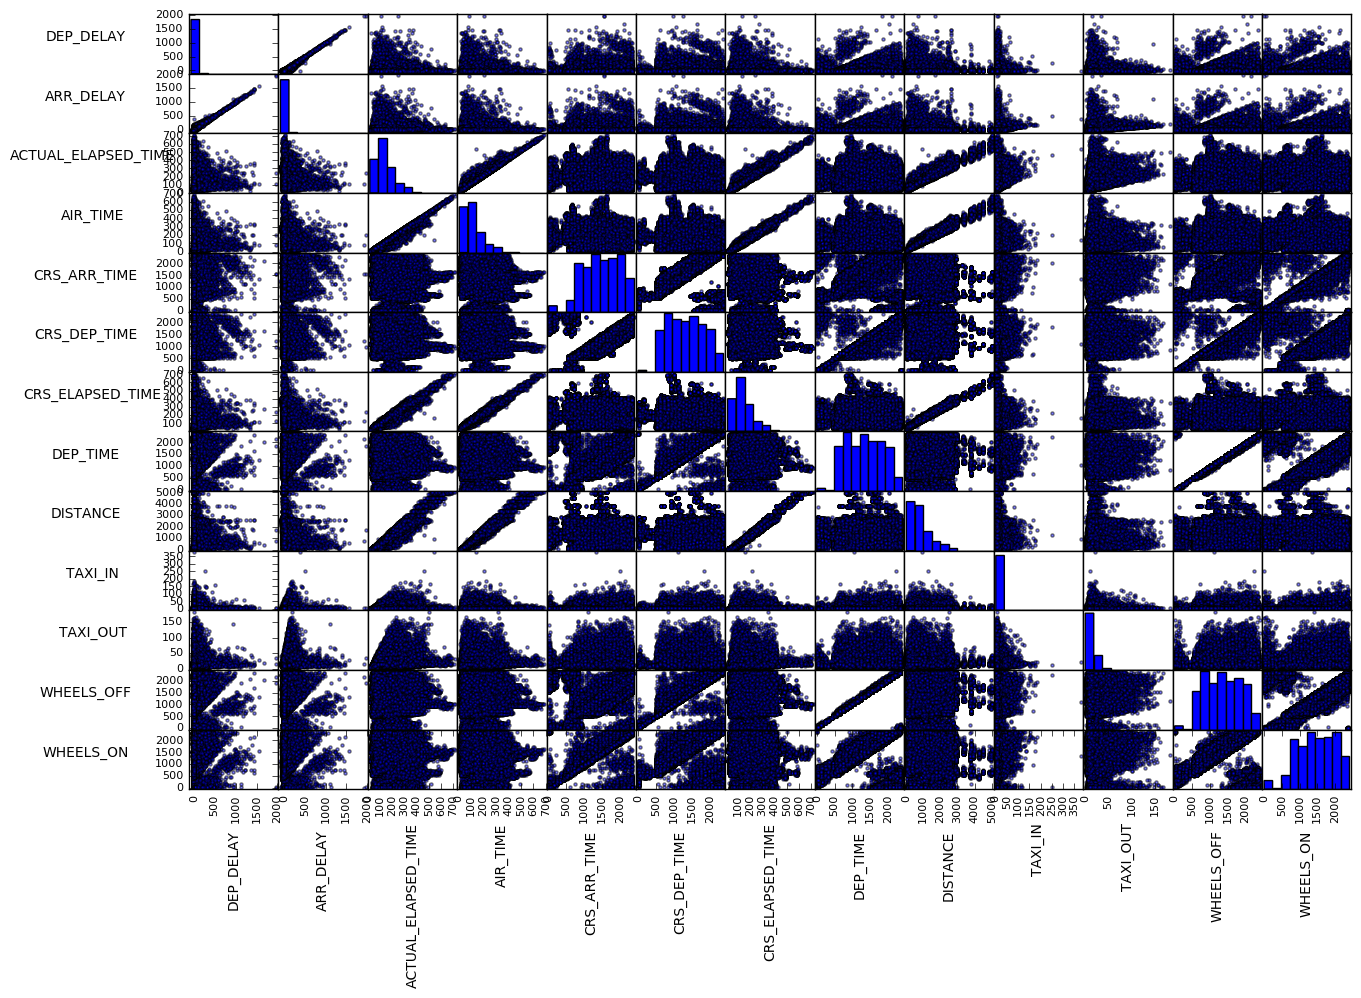

In [15]:
from pandas.tools.plotting import scatter_matrix
df_imputed=df_sampled1[['DEP_DELAY','ARR_DELAY','ACTUAL_ELAPSED_TIME', 'AIR_TIME','CRS_ARR_TIME','CRS_DEP_TIME','CRS_ELAPSED_TIME','DEP_TIME','DISTANCE',
                     'TAXI_IN','TAXI_OUT','WHEELS_OFF','WHEELS_ON']]
ax = scatter_matrix(df_imputed,figsize=(15, 10))
n = len(df_imputed.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        axs = ax[x, y]
        # to make x axis name vertical  
        axs.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        axs.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        axs.yaxis.labelpad = 50


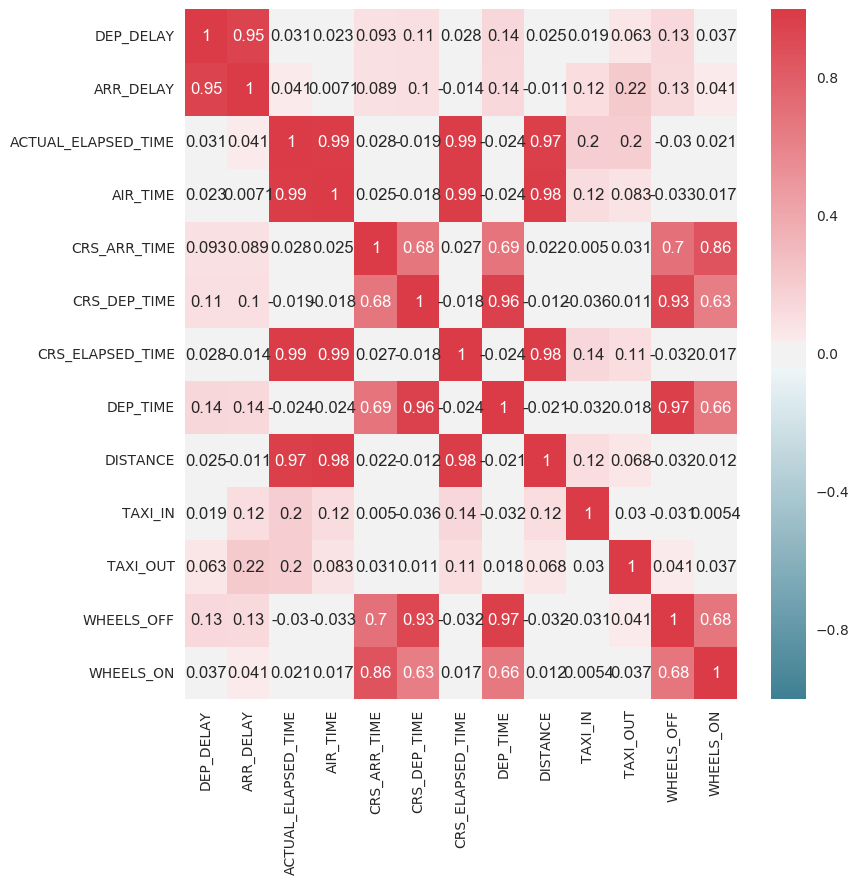

In [20]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_imputed.corr(), cmap=cmap, annot=True)

f.tight_layout()

### Analysis

#### Per the scatter matrix, it appears that departure delays, arrival delays, actual elapsed time, air time, CRS elapsed time, distance, taxi in and taxi out are right skewed.  Also, based on scatter matrix and correlation heat map, there appears to be a strong correlation between multiple variables. 

#### Departure Delay and Arrival Delay are highly correlated with R2=0.95. 
#### Actual elapsed time is highly correlated with Air time and CRS Elapsed time (R2=0.99) and with Distance (R2=0.97)
#### Departure time is highly correlated with Wheels off (R2=0.97), CRS Departure Time (R2=0.96)
#### CRS Arrival time is medium correlated with Wheels On (R2=0.86)

#### Esentially, all departure times and all arrival times are highly correlated with each other, as expected, since generally speaking, the departure time is dictated by when the plane takes off (wheels off), the distance and departure time and when the plane lands (wheels on) dictates the arrival time.

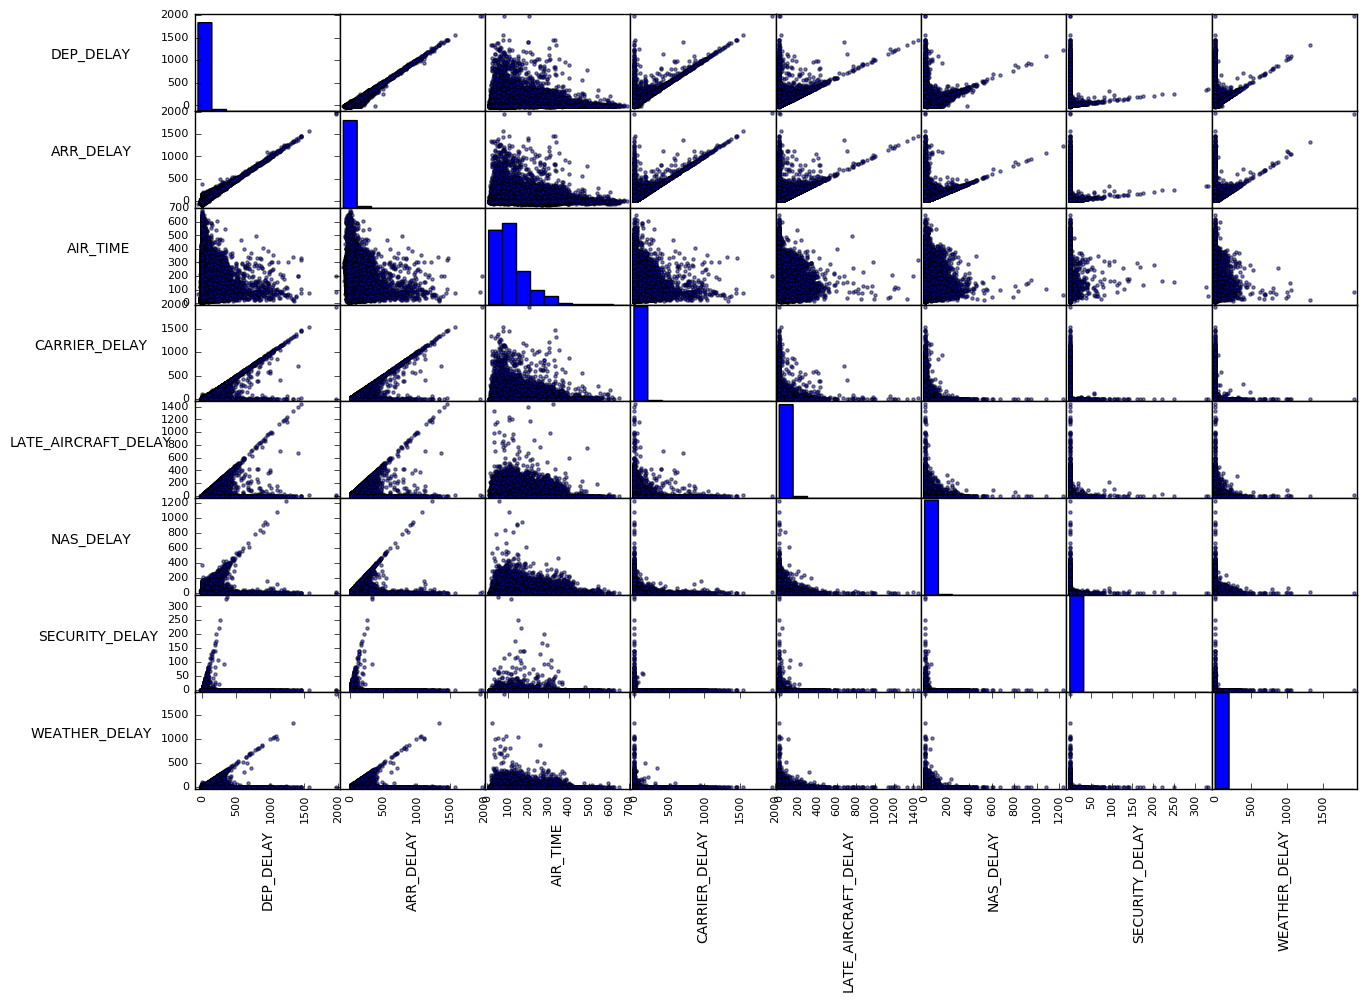

In [16]:
from pandas.tools.plotting import scatter_matrix
df_delays=df_sampled1[['DEP_DELAY','ARR_DELAY','AIR_TIME', 'CARRIER_DELAY','LATE_AIRCRAFT_DELAY','NAS_DELAY','SECURITY_DELAY','WEATHER_DELAY']]
ax = scatter_matrix(df_delays,figsize=(15, 10))
n = len(df_delays.columns)
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        axs = ax[x, y]
        # to make x axis name vertical  
        axs.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        axs.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        axs.yaxis.labelpad = 50

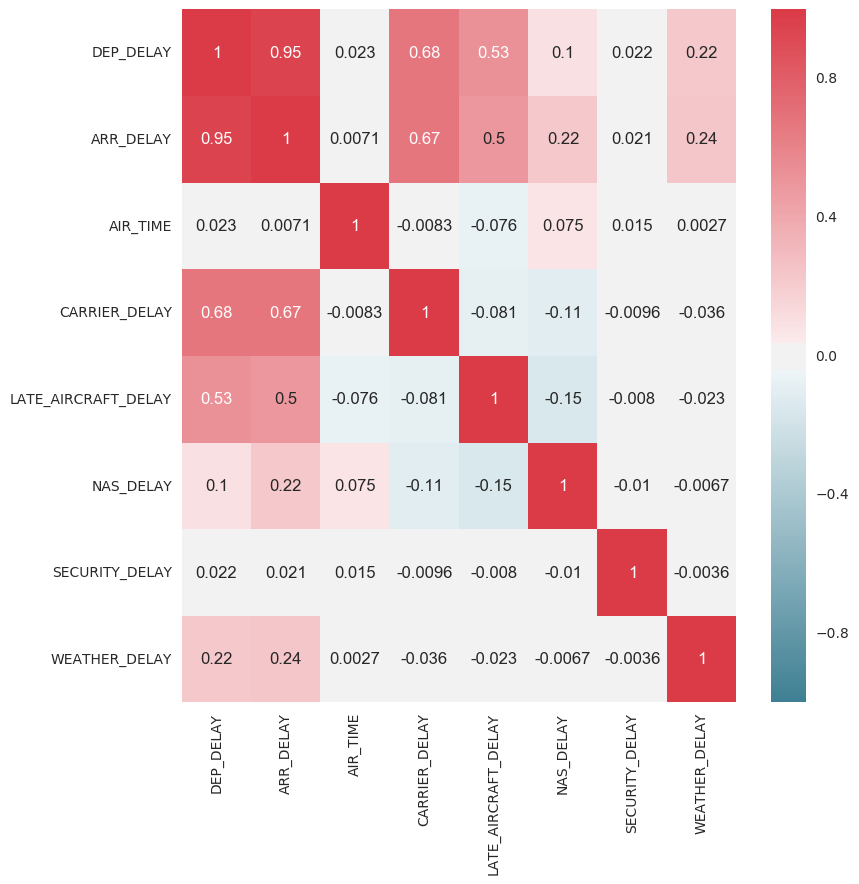

In [17]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_delays.corr(), cmap=cmap, annot=True)

f.tight_layout()

### Plotting-Delay Rate

Plot to see which Airline group has the maximum delay rate. 

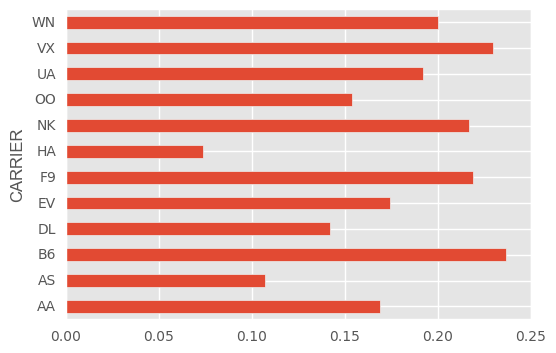

In [18]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

plt.style.use('ggplot')

df_grouped = df_sampled1.groupby(by='CARRIER')
delay_rate = df_grouped.DEP_DEL15.sum() / df_grouped.DEP_DELAY_GROUP.count()
ax = delay_rate.plot(kind='barh')

In [23]:
def is_delayed(x):
    return x > 0

df_sampled['DELAYED'] = df_sampled['DEP_DEL15'].apply(is_delayed)
df_grouped.DEP_DEL15 = df_sampled['DEP_DEL15'].apply(lambda x: x > 0)
df_grouped.DEP_DEL15.value_counts()

False    463287
True     97563 
Name: DEP_DEL15, dtype: int64

In [24]:
not_delayed = df_sampled['DELAYED'].value_counts()[0] # first value of the result above
delayed = df_sampled['DELAYED'].value_counts()[1] # second value of the result above
total_flights = not_delayed + delayed # total count of flights
print float(delayed) / total_flights # converting to float to get a float result

0.173955603102


In [25]:
group_by_carrier = df_sampled.groupby(['CARRIER','DELAYED'])
group_by_carrier.size()

CARRIER  DELAYED
AA       False      75565 
         True       15208 
AS       False      15822 
         True       1888  
B6       False      21813 
         True       6643  
DL       False      78911 
         True       13033 
EV       False      39386 
         True       8099  
F9       False      7596  
         True       2102  
HA       False      7119  
         True       564   
NK       False      11095 
         True       2996  
OO       False      51912 
         True       9289  
UA       False      44441 
         True       10460 
VX       False      5421  
         True       1587  
WN       False      104206
         True       25694 
dtype: int64

In [26]:
count_delays_by_carrier = group_by_carrier.size().unstack()
count_delays_by_carrier

DELAYED   False   True
CARRIER               
AA       75565   15208
AS       15822   1888 
B6       21813   6643 
DL       78911   13033
EV       39386   8099 
F9       7596    2102 
HA       7119    564  
NK       11095   2996 
OO       51912   9289 
UA       44441   10460
VX       5421    1587 
WN       104206  25694

### Plotting grouped data

We can see clearly from the Count Delays by Carrier table that Southwest (WN) had more delays than any other airline, but all the airlines had proportionally similar rates of delayed flights. We projected this by plotting the delayed and non-delayed flights and by stacking the "True" and "False" delayed values vertically.

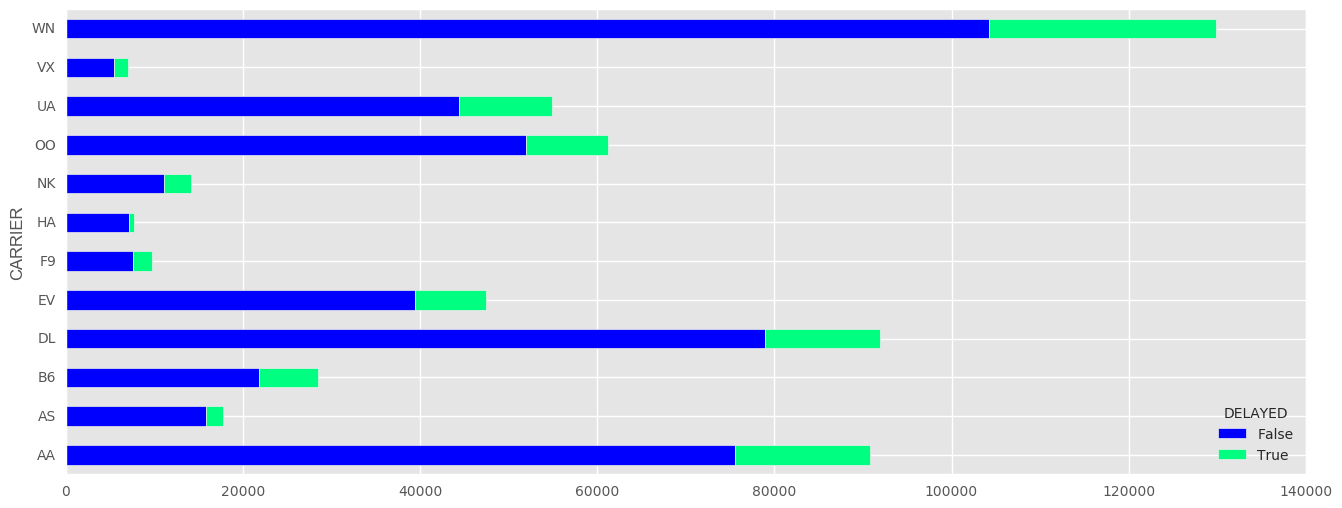

In [27]:
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

### Plotting-Total Minutes Delay

In this graph we're projecting which airlines contributed most to the total sum minutes of delay. We did this by creating a Pivot table of the daily sum of delay minutes by airline and then plotted the delays as a stacked bar chart.

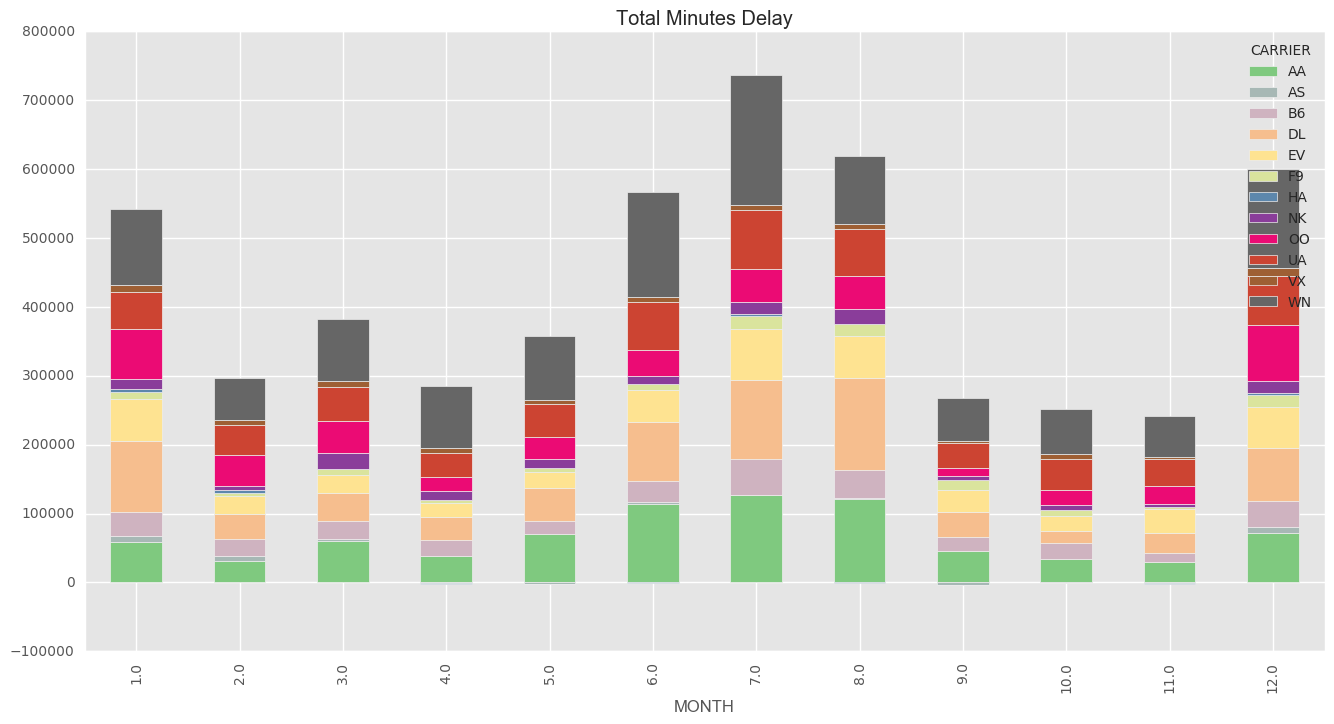

In [28]:
delay_by_day_carrier = df_sampled.pivot_table(index='MONTH', columns='CARRIER', values='DEP_DELAY', aggfunc='sum')
delay_by_day_carrier.plot(kind='bar', figsize=[16,8], stacked=True, colormap='Accent', title='Total Minutes Delay')

### Plotting- Flight Delays by type of Delay

We're building an area chart, or a stacked accumulation of counts, to illustrate the relative contribution of the type of delays. It looks like flights were delayed maximum by the LateAircraftDelay.

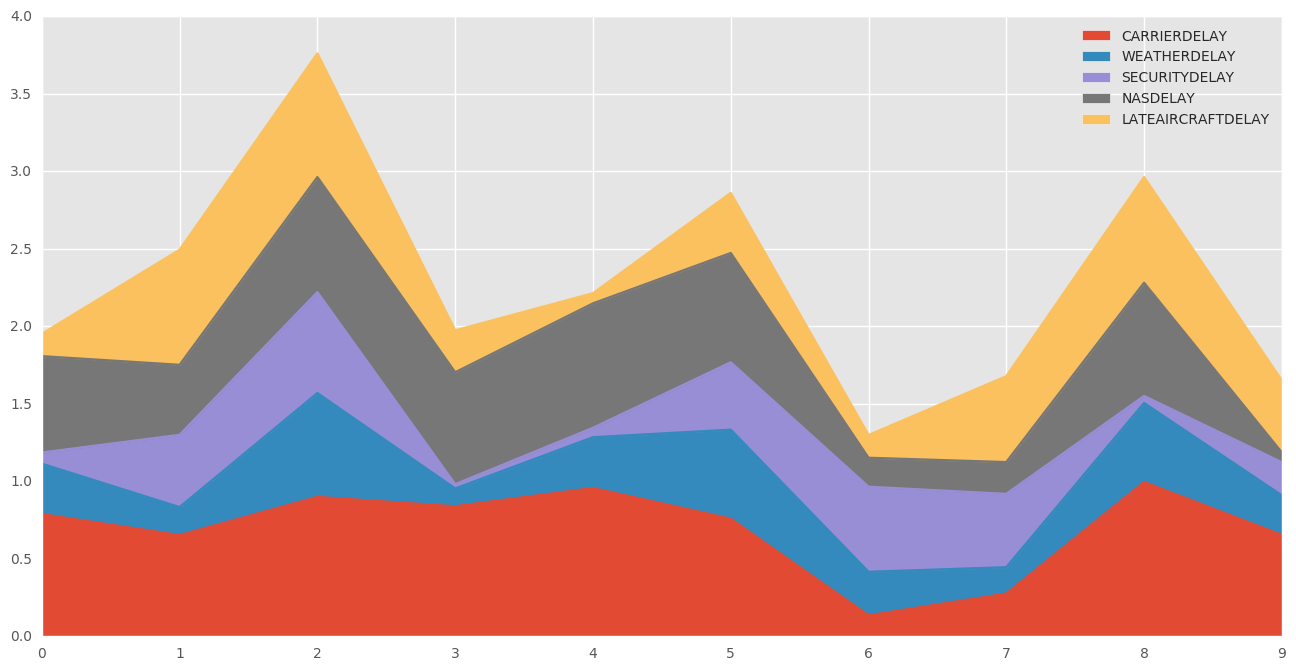

In [29]:
df5 = pd.DataFrame(np.random.rand(10, 5),columns=['CARRIERDELAY', 'WEATHERDELAY', 'SECURITYDELAY','NASDELAY','LATEAIRCRAFTDELAY'])

df5.plot.area(figsize=[16,8]);

### Analysis 

#### From the scatter plot matrix and correlation heat map of arrival delay and departure delay with different delay types, it appears that both Arrival delay and Departure delay is somewhat correlated with late aircraft delay (0.53) and carrier delay (0.68) only.  Oodly, security delay, weather delay, and nas delay do not effect the departure/arrival delays.  All delay types:  Carrier delay, late aircraft delay, nas delay, security delay, weather delay, all appear to be right skewed.

# Explore Attributes and Class

# New Features

In order to determine airline reliability, we will create a new boolean flag called "Reliablity".  This new variable will be
computed based on departure delay, arrival delay, diverted flag, and cancellation flag.

Furthermore, few of the features that may have been helpful in determing flight reliability include the following:

    1.  The size of the airport hub - It would be interesting to see whether larger airport hubs are easier to travel out of than
        smaller ones and if the quality/performance of flights is effected based on the size.
    2.  The quality of the airline based on the revenue generated by them.  Is an airline that is in a bigger city more reliable 
        than an airline that serves areas where there are only few airline options.

# Exceptional Work

### PCA Analysis

The main purpose of a principal component analysis is the analysis of data to identify patterns and finding patterns to reduce the dimensions of the dataset with minimal loss of information.
Our aim of the principal component analysis is to project a feature space onto a smaller subspace that represents our data “well”. 

In [30]:
df_imputed=df_sampled1[['DEP_DELAY','ARR_DELAY','ACTUAL_ELAPSED_TIME', 'AIR_TIME','CRS_ARR_TIME','CRS_DEP_TIME','CRS_ELAPSED_TIME','DEP_TIME','DISTANCE',
                     'TAXI_IN','TAXI_OUT','WHEELS_OFF','WHEELS_ON','CARRIER']]

In [40]:
import pandas as pd
import numpy as np
df = pd.DataFrame(df_imputed[:50])

In [41]:
df['CARRIER'] = pd.Categorical.from_array(df.CARRIER).codes

In [42]:
print (df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2016 to 2016
Data columns (total 14 columns):
DEP_DELAY              50 non-null float64
ARR_DELAY              50 non-null float64
ACTUAL_ELAPSED_TIME    50 non-null float64
AIR_TIME               50 non-null float64
CRS_ARR_TIME           50 non-null float64
CRS_DEP_TIME           50 non-null float64
CRS_ELAPSED_TIME       50 non-null float64
DEP_TIME               50 non-null float64
DISTANCE               50 non-null float64
TAXI_IN                50 non-null float64
TAXI_OUT               50 non-null float64
WHEELS_OFF             50 non-null float64
WHEELS_ON              50 non-null float64
CARRIER                50 non-null int8
dtypes: float64(13), int8(1)
memory usage: 5.5 KB
None


DEP_DELAY  ARR_DELAY  ACTUAL_ELAPSED_TIME  AIR_TIME  CRS_ARR_TIME  \
2016 -24.0      -17.0       47.0                 19.0      2352.0         
2016  24.0       27.0       66.0                 50.0      1503.0         
2016 -19.0      -16.0       153.0                136.0     1300.0         
2016  0.0       -14.0       369.0                352.0     2103.0         
2016 -9.0       -18.0       68.0                 45.0      1842.0         

      CRS_DEP_TIME  CRS_ELAPSED_TIME  DEP_TIME  DISTANCE  TAXI_IN  TAXI_OUT  \
2016  2312.0        40.0              2248.0    83.0      8.0      20.0       
2016  1400.0        63.0              1424.0    223.0     6.0      10.0       
2016  1030.0        150.0             1011.0    937.0     7.0      10.0       
2016  1740.0        383.0             1740.0    2677.0    5.0      12.0       
2016  1725.0        77.0              1716.0    284.0     4.0      19.0       

      WHEELS_OFF  WHEELS_ON  CARRIER  
2016  2308.0      2327.0     6        
2016  1434.0      1524.0     3        
2016  1021.0      1237.0     1        
2016  1752.0      2044.0     3        
2016  1735.0      1820.0     4

### Step 1: Load and Standardize Data

First we’ll load the data and store it in a pandas dataframe. The data set contains data from 5600 users (instances). 
Even though all of the features in the dataset are measured on the same scale (a 0 through 5 rating), we must make sure that we standardize the data by transforming it onto a unit scale (mean=0 and variance=1). Also, all null (NaN) values were converted to 0. It is necessary to transform data because PCA can only be applied on numerical data.

In [43]:
# now let's use PCA, and LDA to find the two "best" dimensions of this data
# these are linear transforms to help project the features into something more understandable

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler


X = df.as_matrix(columns=df.columns[0:])
#y = df.as_matrix(columns=df.columns[14:])
y = df['CARRIER'].values
X = (X - np.mean(X, 0)) / np.std(X, 0)


### Step 2: Covariance Matrix and Eigendecomposition

Next, a covariance matrix is created based on the standardized data. The covariance matrix is a representation of the covariance between each feature in the original dataset. 
The covariance matrix can be found as follows:

In [51]:
pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X) # fit data and then transform it

lda = LDA(n_components=2)
X_lda = lda.fit(X,y).transform(X)

# print the components

print ('pca:', pca.components_)
print ('lda:', lda.scalings_.T)

('pca:', array([[ 0.22591133,  0.24529499, -0.38865343, -0.39094533,  0.13380588,
         0.24364559, -0.39027678,  0.25931001, -0.37716838, -0.12651305,
         0.0090253 ,  0.25802371,  0.12051743,  0.22053612],
       [-0.1095552 , -0.10907054, -0.24734559, -0.22832147, -0.34008714,
        -0.39354191, -0.23634817, -0.39078346, -0.24247943, -0.1740998 ,
        -0.15244104, -0.39653801, -0.28247088,  0.18522041]]))
('lda:', array([[  1.41673314e-14,  -1.32463003e-15,   3.67070113e-15,
          3.26661360e-15,   3.59914817e-16,   1.16784487e-13,
          1.17094453e-14,   1.85888451e-14,  -1.71953324e-14,
          1.13651733e-16,   3.00222477e-15,  -1.38498991e-13,
          5.19304125e-16,  -3.27073341e+16]]))


### Step 3: Selecting Principal Components

Eigenvectors, or principal components, are a normalized linear combination of the features in the original dataset. The first principal component captures the most variance in the original variables, and the second component is a representation of the second highest variance within the dataset. 

For example, if you were to plot data from a dataset that contains two features, the following illustrates that principal component 1 (PC1) represents the direction of the most variation between the two features and principal component 2 (PC2) represents the second most variation between the two plotted features. 

In [55]:
#Explained variance
print pca.explained_variance_ratio_ 

[ 0.34940801  0.248181  ]


As can be seen below,the first two principal components describe approximately 60% of the variance in the data. In order to gain a more comprehensive view of how each principal component explains the variance within the data, we will construct a scree plot. A scree plot displays the variance explained by each principal component within the analysis.

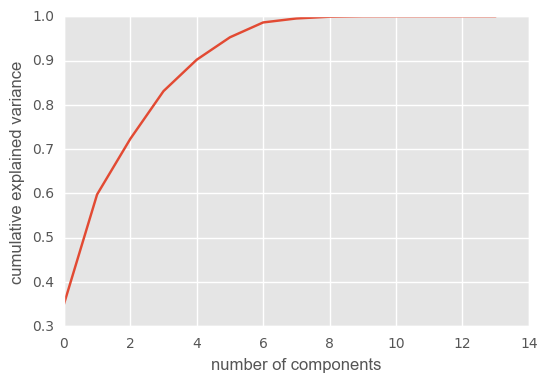

In [56]:
#Explained variance
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

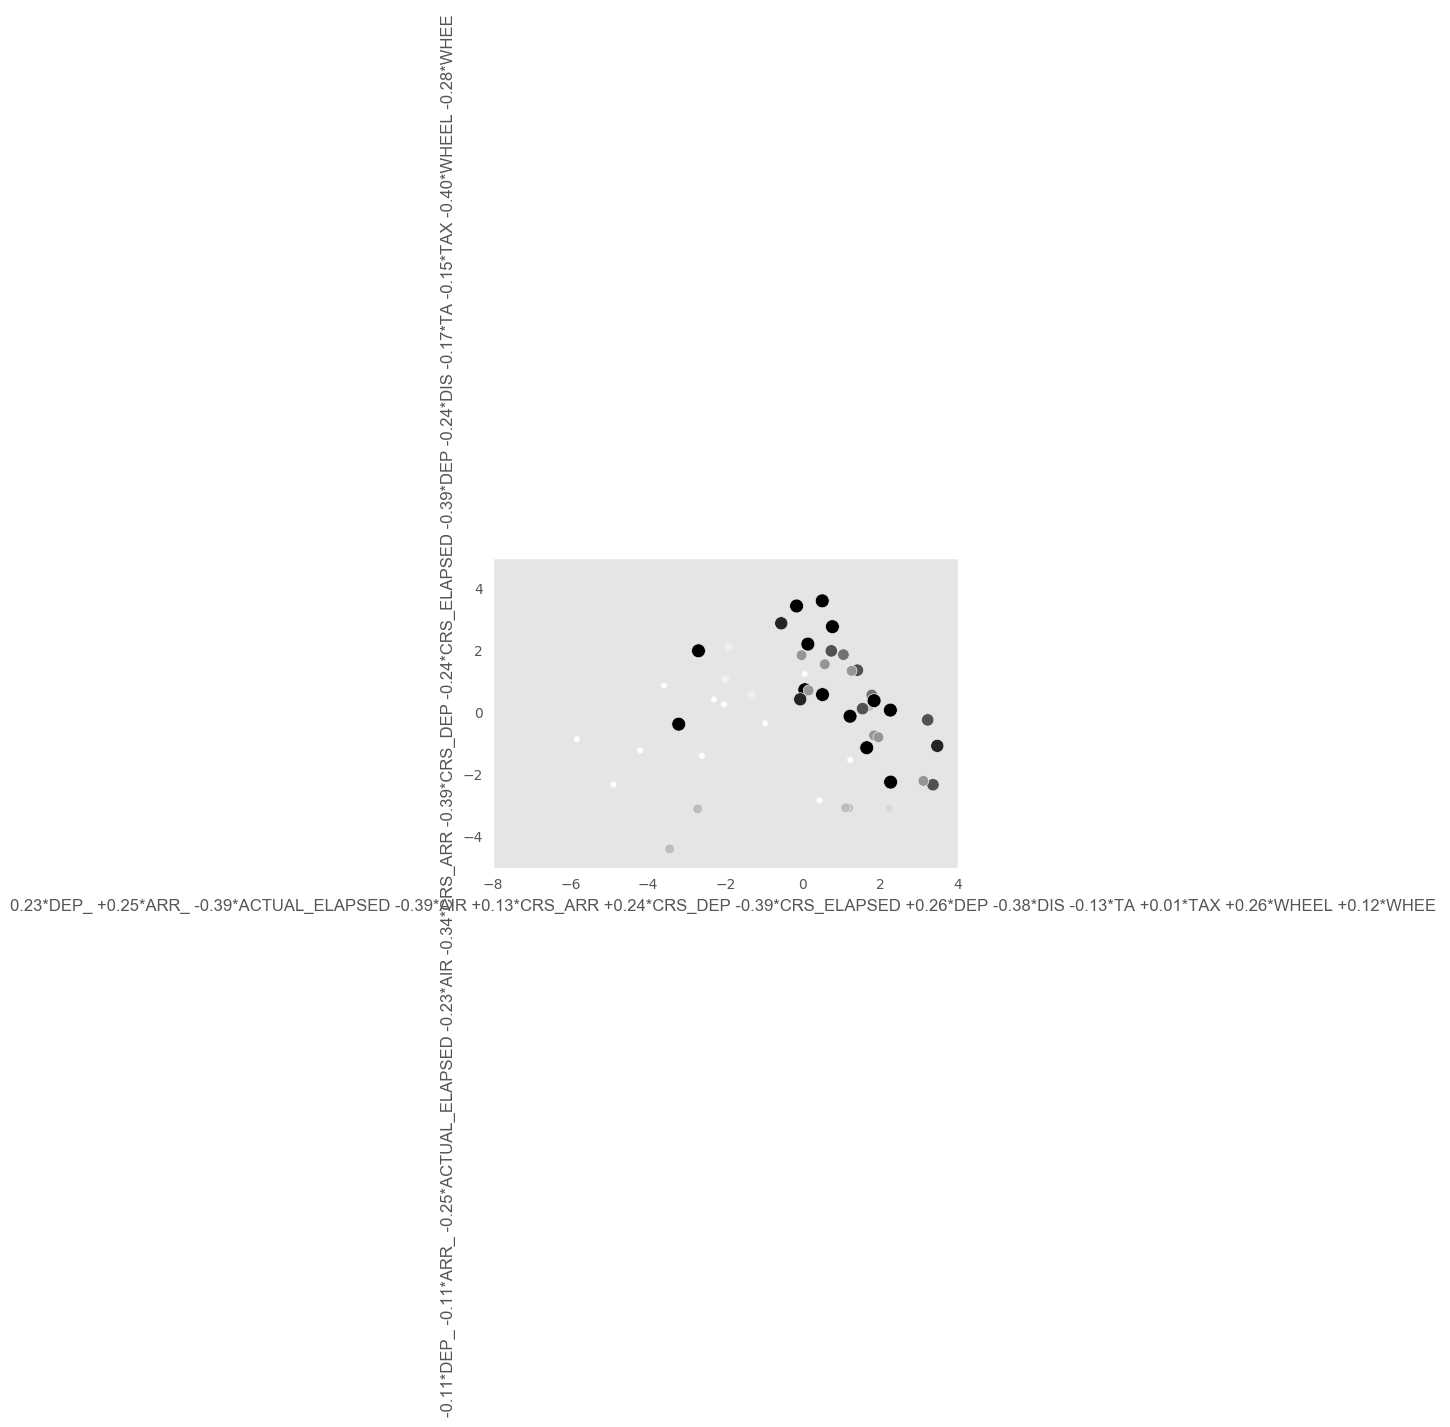

In [52]:
%matplotlib inline
from matplotlib import pyplot as plt
import math

def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array
  
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, df.columns[:13]) 
lda_weight_strings = get_feature_names_from_weights(lda.scalings_.T, df.columns[:13]) 


# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])
df_lda = pd.DataFrame(X_lda,columns=[lda_weight_strings])


from pandas.tools.plotting import scatter_plot

# scatter plot the output, with the names crated from the weights
ax = scatter_plot(df_pca, pca_weight_strings[0], pca_weight_strings[1], c=y, s=(y+2)*10)
newfig = plt.figure()
#ax = scatter_plot(df_lda, lda_weight_strings[0],lda_weight_strings[1], c=y, s=(y+2)*10)
#newfig = plt.figure()